# SVM (Support Vector Machine) on Iris Data
 This notebook demonstrates a complete SVM pipeline using the Iris dataset. It includes:

 - Loading the data
 - Splitting into training and test sets
 - Feature scaling
 - Fitting an SVM classifier
 - Evaluating performance (confusion matrix, classification report, accuracy)
 - Hyperparameter tuning via grid search
 - Plotting decision boundaries for a 2D subspace (using the first two features)

### Import necessary libraries

In [15]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)


#### Data Loading and Preprocessing
 We load the Iris dataset, use smaller variable names, split the data, and standardize the features.


In [16]:
ds = load_iris()
x = ds.data         # Features
y = ds.target       # Labels

#### Split into training and test sets

In [17]:
xt, xte, yt, yte = train_test_split(x, y, test_size=0.2, random_state=42)

#### Standardize the features

In [18]:
sc = StandardScaler()
xt = sc.fit_transform(xt)
xte = sc.transform(xte)

#### SVM Model Training and Evaluation
 We train an SVM with a linear kernel and evaluate its performance.


In [19]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(xt, yt)

SVC(kernel='linear', random_state=42)

#### Predict and evaluate the model

In [20]:
yp = clf.predict(xte)

print("Confusion Matrix:\n", confusion_matrix(yte, yp))
print("\nClassification Report:\n", classification_report(yte, yp))
print("Accuracy Score:", accuracy_score(yte, yp))

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy Score: 0.9666666666666667


#### Hyperparameter Tuning with Grid Search
 To further improve our model, we can perform grid search cross-validation on the SVM parameters. This example tunes the regularization parameter `C`.


#### Define a parameter grid and perform grid search

In [21]:
param_grid = {'C': [0.1, 1, 10, 100]}
gs = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, cv=5)
gs.fit(xt, yt)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [0.1, 1, 10, 100]})

#### Display the best parameters and score from grid search

In [22]:
print("Best Params:", gs.best_params_)
print("Best CV Score:", gs.best_score_)

Best Params: {'C': 10}
Best CV Score: 0.9583333333333334


#### Evaluate the best estimator on the test set

In [23]:
yp_gs = gs.best_estimator_.predict(xte)
print("\nGrid Search Test Accuracy:", accuracy_score(yte, yp_gs))


Grid Search Test Accuracy: 0.9666666666666667


#### Decision Boundary Plotting (2D)
 Since the Iris dataset is 4-dimensional, we select only the first two features to visualize the decision boundaries.

In [24]:
x_2d = x[:, :2]
xt2, xte2, yt2, yte2 = train_test_split(x_2d, y, test_size=0.2, random_state=42)
sc2 = StandardScaler()
xt2 = sc2.fit_transform(xt2)
xte2 = sc2.transform(xte2)

#### Train SVM on the two-feature dataset

In [25]:
clf2 = SVC(kernel='linear', random_state=42)
clf2.fit(xt2, yt2)

SVC(kernel='linear', random_state=42)

#### Create a mesh grid to plot the decision boundaries

In [26]:
h = 0.02  # step size in the mesh
x_min, x_max = xt2[:, 0].min() - 1, xt2[:, 0].max() + 1
y_min, y_max = xt2[:, 1].min() - 1, xt2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#### Predict over the grid

In [27]:
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#### Plot contour and training points

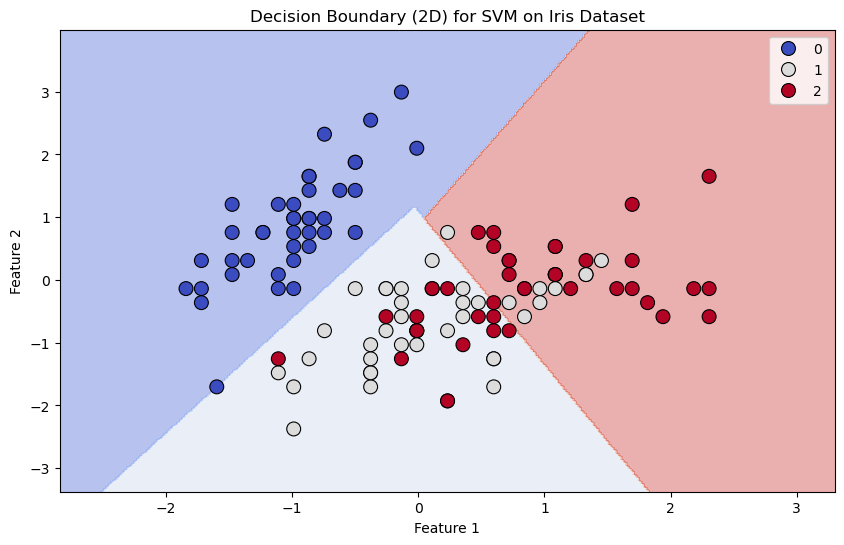

In [28]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=xt2[:, 0], y=xt2[:, 1], hue=yt2, palette='coolwarm', edgecolor='k', s=100)
plt.title("Decision Boundary (2D) for SVM on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
